## Amarcord Case Working Notebook

In [53]:
path = 'C:/users/mohdh/Documents/MSBA/Time Series/hbs_cases/amarcord_1/'

In [711]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as datetime
np.set_printoptions(suppress=True)

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 12,6

import os, sys
sys.path.append('C:/users/mohdh/Documents/MSBA/python modules/')
import preprocessing
module_path = os.path.abspath(os.path.join('../../MSBA/time_series_20191113/modules/'))
if module_path not in sys.path:
    sys.path.append(module_path)
import testing
import boxcox
import grid
import build

In [296]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 12,6

Note: `iloc[:,:]` added to get rid of empty cells read in.

In [297]:
monthly_data = pd.read_csv(path+'monthly_wires.csv').iloc[:12,:8]

In [298]:
monthly_data

,Month,2007,2008,2009,2010,2011,2012,2013
0,January,395.14,*,385.2,375.20,385.25,374.15,390.15
1,February,389.25,*,370.55,BB#e.?,362.15,371.25,371.25
2,March,394.20,414.2,341.44,373.55,373.55,401.45,369.40
3,April,419.00,425.25,416.21,414.19,413.75,99999999999,421.10
4,May,335.25,365.5,*,382.45,417.70,395.5,413.25
5,June,424.52,455.1,444.25,413.00,418.60,423.29,418.25
6,July,431.30,-123456789,457.5,381.00,421.20,441.45,423.55
7,August,494.50,474,460.18,494.20,465.48,483.25,486.75
8,September,374.27,410.2,423.91,413.25,444.91,>>>?robins,441.50
9,October,444.00,440.4,415.45,423.55,453.70,424.2,452.70


In [299]:
def clean_floats(x):
  try:
    if (type(x) != float):
      x = float(x)
      if (x < 0) | (x > 1000000):
        return None
      else:
        return x
    else:
      return float(x)
  except:
    return None

In [300]:
for i in range(1, len(monthly_data.columns)):
    monthly_data.iloc[:,i] = monthly_data.iloc[:,i].apply(clean_floats)

In [301]:
monthly_data

,Month,2007,2008,2009,2010,2011,2012,2013
0,January,395.14,NaN,385.20,375.20,385.25,374.15,390.15
1,February,389.25,NaN,370.55,NaN,362.15,371.25,371.25
2,March,394.20,414.20,341.44,373.55,373.55,401.45,369.40
3,April,419.00,425.25,416.21,414.19,413.75,NaN,421.10
4,May,335.25,365.50,NaN,382.45,417.70,395.50,413.25
5,June,424.52,455.10,444.25,413.00,418.60,423.29,418.25
6,July,431.30,NaN,457.50,381.00,421.20,441.45,423.55
7,August,494.50,474.00,460.18,494.20,465.48,483.25,486.75
8,September,374.27,410.20,423.91,413.25,444.91,NaN,441.50
9,October,444.00,440.40,415.45,423.55,453.70,424.20,452.70


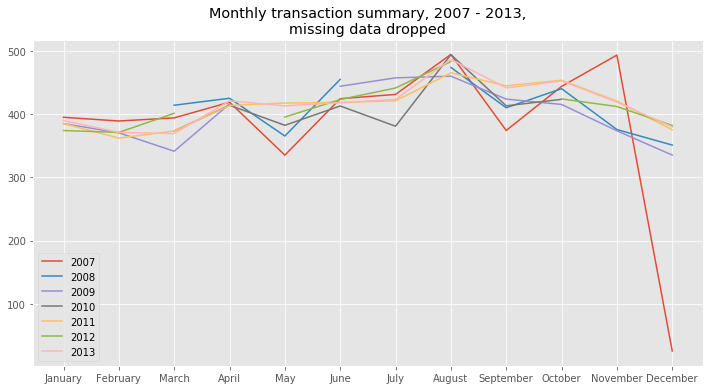

In [61]:
for i in range(1, len(monthly_data.columns)):
  lab = monthly_data.columns[i]
  plt.plot(monthly_data.iloc[:,0],monthly_data.iloc[:,i], label=lab)

plt.title('Monthly transaction summary, 2007 - 2013,\nmissing data dropped')
plt.legend()
plt.show()

In [62]:
for i in range(1, len(monthly_data.columns)):
    monthly_data.iloc[:,i].fillna(monthly_data.iloc[:,i].mean(),
                                inplace=True)

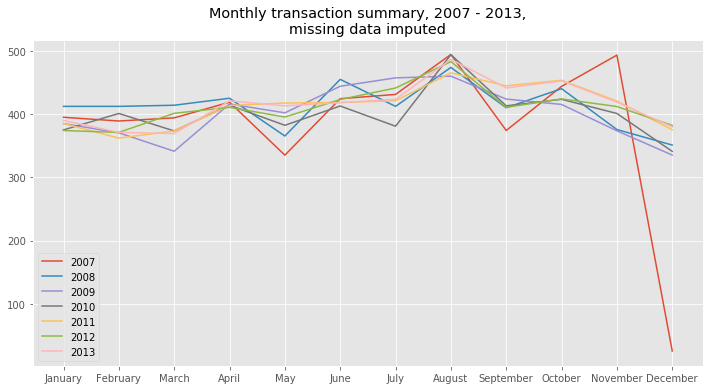

In [63]:
for i in range(1, len(monthly_data.columns)):
    lab = monthly_data.columns[i]
    plt.plot(monthly_data.iloc[:,0],monthly_data.iloc[:,i], label=lab)

plt.title('Monthly transaction summary, 2007 - 2013,\nmissing data imputed')
plt.legend()
plt.show()

### November 2010 Dataset

In [64]:
nov2010_data = pd.read_csv(path+'nov2010_wires.csv').iloc[:17940]

In [65]:
def convert_to_float(x):
    try:
        return float(x)
    except:
        return None

nov2010_data['Transaction Amount'] = nov2010_data['Transaction Amount'].apply(convert_to_float)

In [66]:
def remove_negs(x):
  try:
    if x < 0:
      return None
    else:
      return x
  except:
    print('Closed on Sunday')

In [67]:
nov2010_data['Transaction Amount'] = nov2010_data['Transaction Amount'].apply(remove_negs)

In [68]:
nov2010_data = preprocessing.extract_dt(nov2010_data,'Date of Transaction')

Total time elapsed: 0.06 seconds


In [69]:
import datetime as datetime

nov2010_data.drop(columns = 'hour', inplace=True)

nov2010_data['hour'] = pd.to_datetime(nov2010_data['Time of Transaction']).dt.hour.astype('int')

C:\Users\mohdh\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\mohdh\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


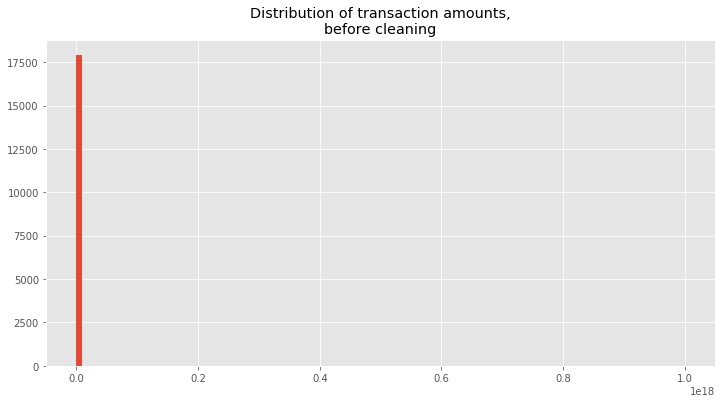

In [70]:
plt.hist(nov2010_data['Transaction Amount'],bins=100)

plt.title('Distribution of transaction amounts,\nbefore cleaning')
plt.show()

In [71]:
def remove_large(x):
  try:
    if x > 1000:
      return None
    else:
      return x
  except:
    print('Closed on Sunday')

In [72]:
nov2010_data['Transaction Amount'] = nov2010_data['Transaction Amount'].apply(remove_large)

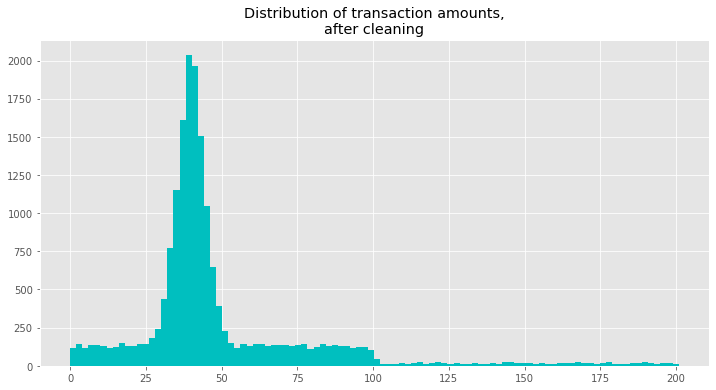

In [73]:
plt.hist(nov2010_data['Transaction Amount'],
         bins=100,
         color='c')

plt.title('Distribution of transaction amounts,\nafter cleaning')
plt.show()

### Amarcord Part II

We were given new information about this particular business:
1. In December, 2007, a major store was flooded and was closed for renovation until March, 2008;
2. In August, 2010, a warehouse belonging to the customer under consideration was sold for $37,900 and the proceeds were deposited into the bank account.

To address (1), we will record Jan and Feb 2008 transactions as 0. For (2), we will reduce the monthly transaction amount by $37,900. This sale should be recognized as an asset sale rather than a business transaction (reflecting operational cash in-flow ). 

In [752]:
monthly_data.iloc[:2,2] = 0
monthly_data.iloc[7,4] = monthly_data.iloc[7,4] - 37.9
monthly_data.iloc[6,2] = monthly_data.iloc[5,2]
monthly_data.iloc[4,3] = monthly_data.iloc[3,3]
monthly_data.iloc[1,4] = monthly_data.iloc[0,4]
monthly_data.iloc[10,4] = monthly_data.iloc[9,4]
monthly_data.iloc[3,6] = monthly_data.iloc[2,6]
monthly_data.iloc[8,6] = monthly_data.iloc[7,6]
monthly_data

,Month,2007,2008,2009,2010,2011,2012,2013
0,January,395.14,0.00,385.20,375.20,385.25,374.15,390.15
1,February,389.25,0.00,370.55,375.20,362.15,371.25,371.25
2,March,394.20,414.20,341.44,373.55,373.55,401.45,369.40
3,April,419.00,425.25,416.21,414.19,413.75,401.45,421.10
4,May,335.25,365.50,416.21,382.45,417.70,395.50,413.25
5,June,424.52,455.10,444.25,413.00,418.60,423.29,418.25
6,July,431.30,455.10,457.50,381.00,421.20,441.45,423.55
7,August,494.50,474.00,460.18,304.70,465.48,483.25,486.75
8,September,374.27,410.20,423.91,413.25,444.91,483.25,441.50
9,October,444.00,440.40,415.45,423.55,453.70,424.20,452.70


In [753]:
ls = []
for i in range(2007,2014):
    ls.extend(list(monthly_data[str(i)]))

In [754]:
ls_idx = []
s = '-'
for i in range(2007,2014):
    for j in range(1,13):
        if len(str(j)) < 2:
            j = '0' + str(j)
        else:
            j = str(j)
            
        ls_idx.append(s.join([str(i),j,'01']))

In [755]:
monthly_ts = pd.DataFrame(list(zip(ls_idx,ls)),
                          columns=['Date','Amount'],
                          index=None)

monthly_ts.reset_index(drop=True,inplace=True)
monthly_ts['Date'] = pd.to_datetime(monthly_ts['Date'])
monthly_ts = monthly_ts.set_index('Date')

In [756]:
monthly_ts

,Amount
Date,
2007-01-01,395.14
2007-02-01,389.25
2007-03-01,394.20
2007-04-01,419.00
2007-05-01,335.25
...,...
2013-08-01,486.75
2013-09-01,441.50
2013-10-01,452.70


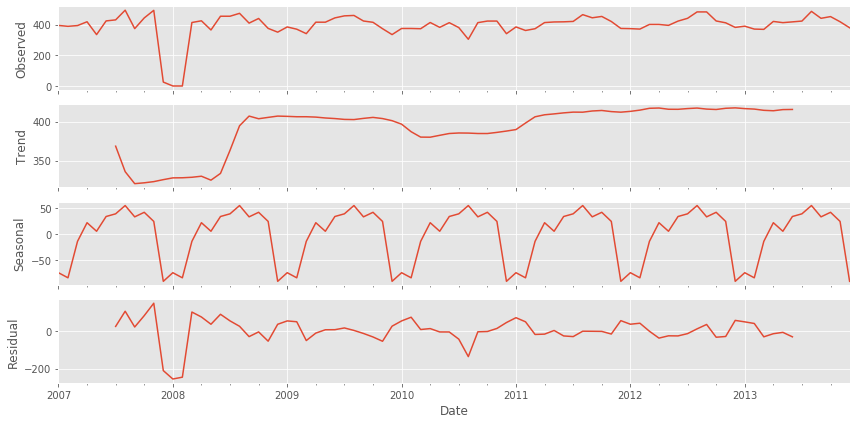

In [757]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(monthly_ts['Amount'], model='additive')
result.plot()

plt.show()

__Executive takeaway:__

Monthly transactions for this client are seasonal. This is expected for most retail businesses (as is the case with this client).

#### November 2010 Transactions

In [758]:
nov2010_data = nov2010_data.sort_values(by=['day',
                                            'Time of Transaction']).reset_index(drop=True)

In [759]:
nov_out = nov2010_data[nov2010_data['Trans ID'].str.contains('OUTWT')].reset_index(drop=True)

In [760]:
nov_in = nov2010_data[nov2010_data['Trans ID'].str.contains('INCWT')].reset_index(drop=True)

In [761]:
nov_can = nov2010_data[nov2010_data['Trans ID'].str.contains('\$C')].reset_index(drop=True)

C:\Users\mohdh\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\mohdh\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


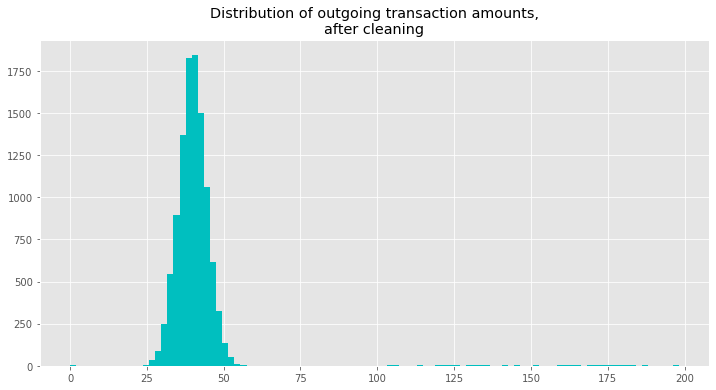

In [762]:
plt.hist(nov_out['Transaction Amount'],
         bins=100,
         color='c')

plt.title('Distribution of outgoing transaction amounts,\nafter cleaning')
plt.show()

In [763]:
print('Records with missing data: ' + str(nov_out['Transaction Amount'].isna().sum()))
nov_out[nov_out['Transaction Amount'].isna()].reset_index(drop=True).head(5)

Records with missing data: 41


,Transaction Amount,Date of Transaction,Time of Transaction,Trans ID,year,month,day,weekday,hour
0,NaN,11/1/2010,1:02,KAJZIZHKUG8100OUTWTUJGBLU,2010,11,1,0,1
1,NaN,11/1/2010,1:03,WJUJDCHDMY7200OUTWTCBLHKA,2010,11,1,0,1
2,NaN,11/1/2010,1:03,NXAGKNTUNB7700OUTWTXXRMBX,2010,11,1,0,1
3,NaN,11/1/2010,1:03,UAGQEAIFCJ8200OUTWTQTIJBI,2010,11,1,0,1
4,NaN,11/1/2010,1:03,EYQZQGSONP6500OUTWTLKEFVG,2010,11,1,0,1


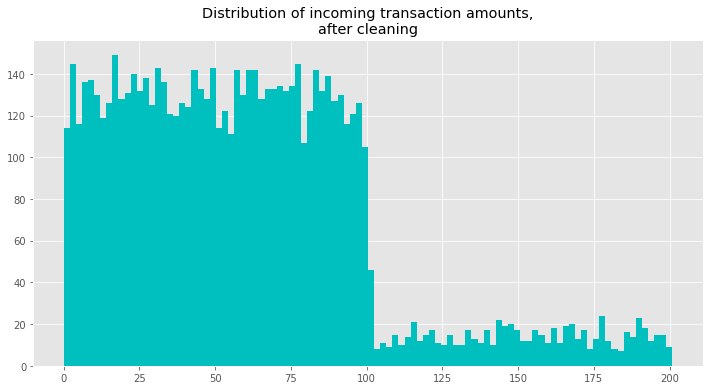

In [764]:
plt.hist(nov_in['Transaction Amount'],
         bins=100,
         color='c')

plt.title('Distribution of incoming transaction amounts,\nafter cleaning')
plt.show()

In [765]:
print('Records with missing data: ' + str(nov_in['Transaction Amount'].isna().sum()))
nov_in[nov_in['Transaction Amount'].isna()].reset_index(drop=True).head(5)

Records with missing data: 0


,Transaction Amount,Date of Transaction,Time of Transaction,Trans ID,year,month,day,weekday,hour


##### Missing value imputation

Below, we replace missing values in the outgoing transactions with 0:

In [766]:
'''
Args:
    x: float or int type
    
Output: original x value or 0
'''
def replace_nan(x):
    if np.isnan(x):
        x = 0
    return x

In [767]:
nov_out['Transaction Amount'] = nov_out['Transaction Amount'].apply(replace_nan)

## Exploratory Data Analysis

In [768]:
'''
Args:
    data: pandas DataFrame type
    time = time intervals desired, defaults to daily intervals
    dataframe = if True, returns pd.DataFrame.groupby object as DataFrame.
                Default False
'''
def raw_plot(data, time = 'hour', dataframe = False):
    assert type(time) == str
    try:
        df = None
        if time == 'day':
            df = pd.DataFrame({'transaction_amount' : \
                               data.groupby('day')\
                               ['Transaction Amount'].sum()\
                              }\
                             ).reset_index()
        else:
            df = pd.DataFrame({'transaction_amount' : \
                               data.groupby(['day',
                                             'hour'])\
                               ['Transaction Amount'].sum()}\
                             )\
                             .reset_index()
        
        df['idx'] = list(df.index)
        
        lab = 'Hourly'
        if time != 'hour':
            lab = 'Daily'
        
        plt.plot(df['idx'],df['transaction_amount'])
        plt.title(lab + ' sum of transactions for Nov 2010')
        plt.show()
        
        if dataframe:
            return df
        
    except:
        print('Error in plotting')
        

### EDA Incoming Transactions

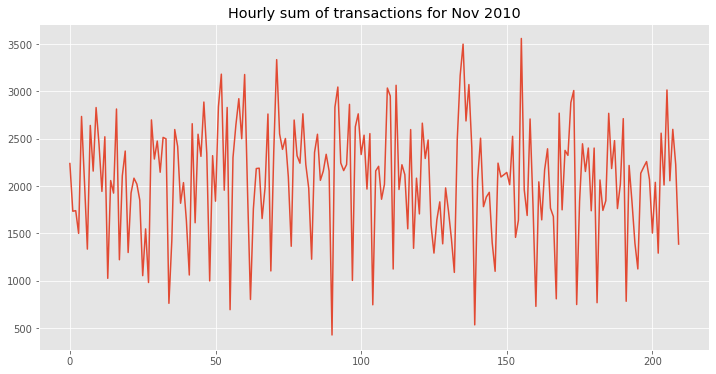

In [769]:
hourly_in = raw_plot(nov_in, time='hour', dataframe=True)

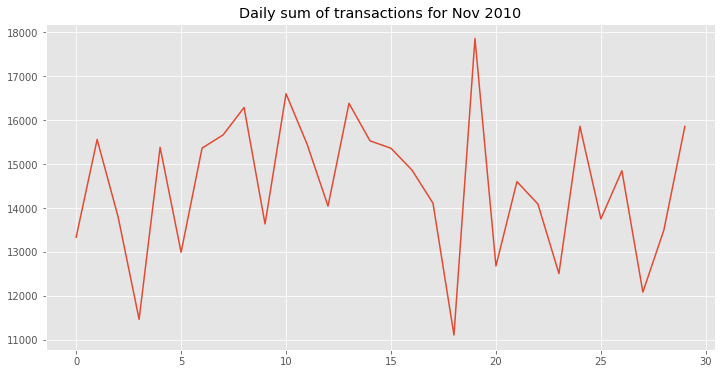

In [770]:
daily_in = raw_plot(nov_in, time='day', dataframe=True)

### EDA Outgoing Transactions

Below, we do some baseline exploratory analysis of the outgoing transactions:

First, the sum of outgoing transactions per hour is plotted. Notice the quiet periods where there are no transactions. This is inherent in the data.

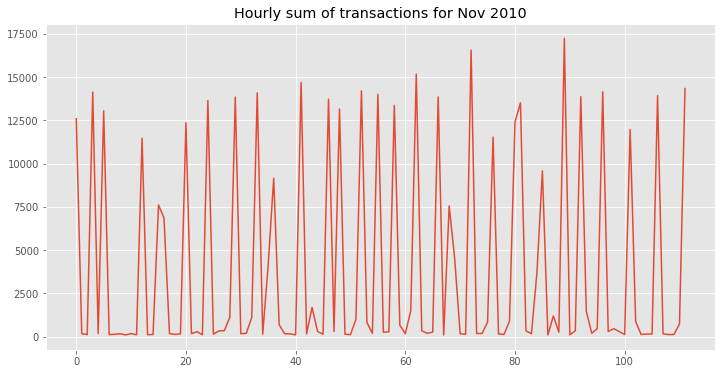

In [88]:
hourly_out = raw_plot(nov_out, time='hour', dataframe=True)

We can also look at outgoing transactions at a daily level. We do this by summing up all transactions for a single day throughout the month.

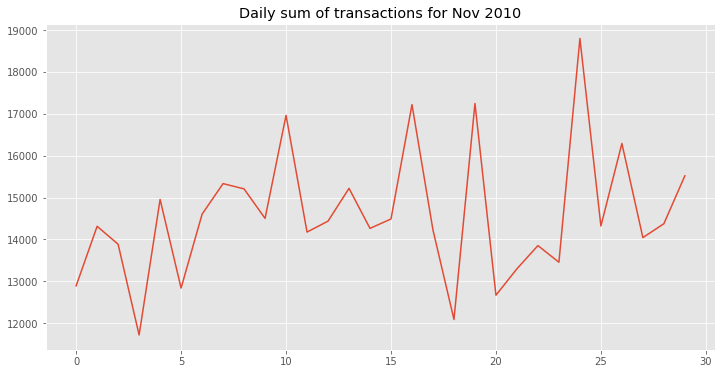

In [89]:
daily_out = raw_plot(nov_out, time='day', dataframe=True)

## Modeling the data

### Monthly with Fourier Series

In [771]:
X_f_m = []
for n,a in enumerate(monthly_ts.index):
    x = [1, n, np.sin(2 * n * np.pi / 12), np.cos(2 * n * np.pi / 12)]
    X_f_m +=[x]

y = list(monthly_ts['Amount'])

X_train, X_test, y_train, y_test = train_test_split(X_f_m,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    shuffle=False)

In [772]:
import statsmodels.api as sm # Time Series Analysis

reg = sm.OLS(y_train,
             X_train)
results = reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     6.376
Date:                Sun, 17 Nov 2019   Prob (F-statistic):           0.000765
Time:                        19:46:25   Log-Likelihood:                -388.11
No. Observations:                  67   AIC:                             784.2
Df Residuals:                      63   BIC:                             793.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        365.2230     19.801     18.445      0.000     325.655     404.791
x1             0.7131      0.517      1.378      0.173      -0.321       1.747
x2           -10.0727     14.288     -0.705      0.483     -38.626      18.480
x3           -56.5497     14.046     -4.026      0.000     -84.618     -28.481
==============================================================================
Omnibus:                       59.152   Durbin-Watson:                   1.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              278.440
Skew:                          -2.688   Prob(JB):                     3.45e-61
Kurtosis:                      11.416   Cond. No.                         75.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

ADF Statistic: -3.170917
p-value: 0.021731
Critical Values:
	1%: -3.546
	5%: -2.912
	10%: -2.594

We reject the Null Hypothesis (H0) -- the time series is stationary


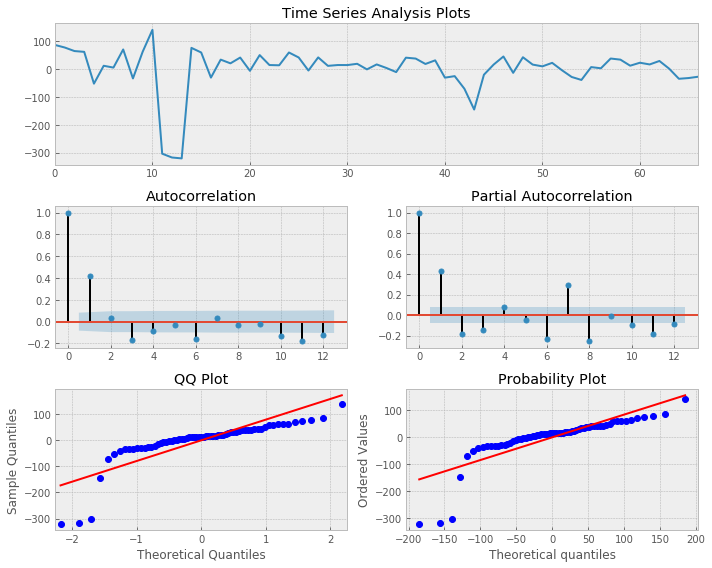

In [773]:
testing.ts_plot(results.resid, lags=12)

---------------
Monthly Outgoing Transactions
Fourier Series
---------------


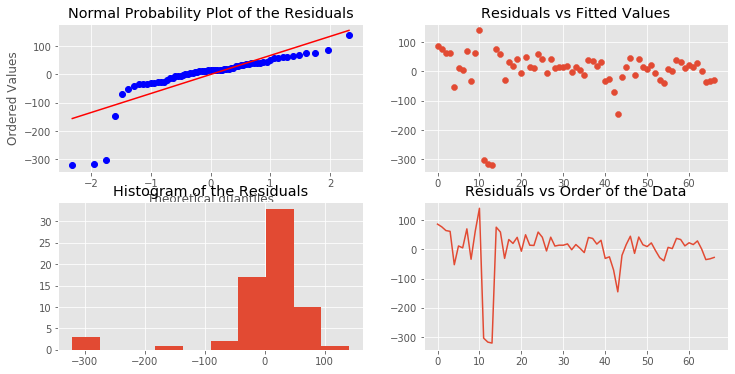

Ljung-Box Test
H_0 (p>0.05) --> The data are independently distributed -- i.e. there's no auto correlations
H_a (p<0.05) --> The data are not independently distributed -- i.e. there is auto correlations
p_values [0.00040755 0.00186533 0.00216106 0.00433755 0.00926121 0.00866239
 0.015803   0.02670446 0.04293599 0.04175069 0.02840842 0.02918992
 0.03348015 0.04897439 0.06864048 0.08600037 0.11389041 0.14564131
 0.18210009 0.22479364]
PROBLEM!  There appears to be information left in the residuals


True

In [774]:
N_in = list(range(len(y_train)))
y_hat = results.predict(X_train)

print('---------------\n%s\n---------------' % ('Monthly Outgoing Transactions\nFourier Series'))
testing.eval_plot(N_in, y_train, y_hat)

In [776]:
perf_in = {}
perf_in['daily_incoming'] = testing.measure_error(y_train, y_hat, label='Daily Regressors')

+------------+--------------------+
|   metric   |       value        |
+------------+--------------------+
|   label    |  Daily Regressors  |
|    RMSE    | 79.34132437106236  |
| RMSE_pcent | 0.2043858979806658 |
+------------+--------------------+


#### Monthly OLS with Fourier Series, L_1

In [777]:
X_f_m = []
for n,a in enumerate(monthly_ts.index):
    x = [1, n, np.sin(2 * n * np.pi / 12), np.cos(2 * n * np.pi / 12)]
    X_f_m +=[x]

X = pd.DataFrame(X_f_m,columns=['Const', 'Idx', 'Sin', 'Cos'])
X['L_1'] = pd.DataFrame(y).shift(1)

In [778]:
y = list(monthly_ts['Amount'])

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    shuffle=False)

In [779]:
import statsmodels.api as sm # Time Series Analysis

reg = sm.OLS(y_train[1:],
             X_train[1:])
results = reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     9.532
Date:                Sun, 17 Nov 2019   Prob (F-statistic):           4.71e-06
Time:                        19:47:01   Log-Likelihood:                -375.54
No. Observations:                  66   AIC:                             761.1
Df Residuals:                      61   BIC:                             772.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Const        206.0441     45.683      4.510      0.000     114.695     297.393
Idx            0.5156      0.489      1.055      0.296      -0.462       1.493
Sin            5.9294     13.698      0.433      0.667     -21.461      33.320
Cos          -40.3097     13.943     -2.891      0.005     -68.190     -12.429
L_1            0.4229      0.115      3.684      0.000       0.193       0.652
==============================================================================
Omnibus:                       47.888   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              274.527
Skew:                          -1.911   Prob(JB):                     2.44e-60
Kurtosis:                      12.231   Cond. No.                     2.01e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

ADF Statistic: -4.501368
p-value: 0.000196
Critical Values:
	1%: -3.544
	5%: -2.911
	10%: -2.593

We reject the Null Hypothesis (H0) -- the time series is stationary


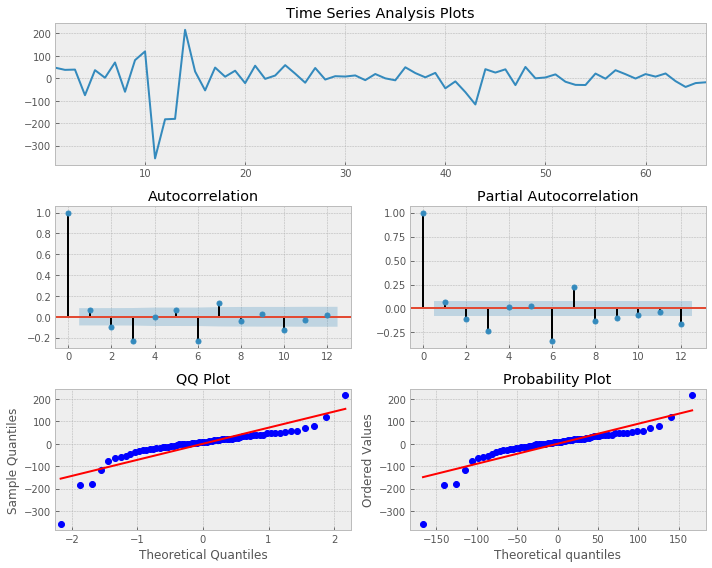

In [780]:
testing.ts_plot(results.resid, lags=12)

---------------
Monthly Outgoing Transactions
Fourier Series, Lag 1
---------------


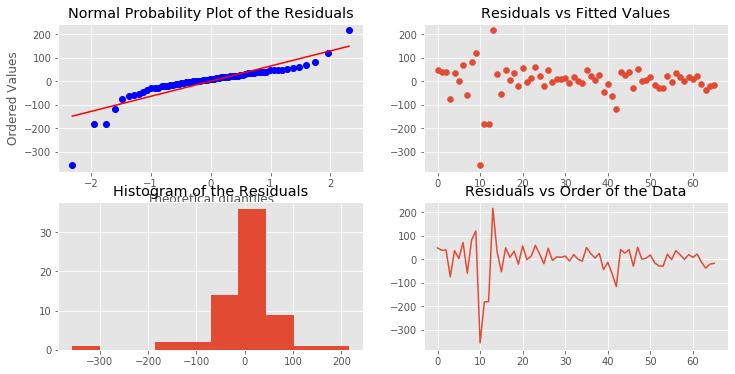

Ljung-Box Test
H_0 (p>0.05) --> The data are independently distributed -- i.e. there's no auto correlations
H_a (p<0.05) --> The data are not independently distributed -- i.e. there is auto correlations
p_values [0.59441191 0.61905321 0.18970782 0.31207113 0.40414932 0.16359857
 0.16467288 0.22751922 0.30140716 0.28538041 0.35783694 0.43763912
 0.51486059 0.5937366  0.66711202 0.71271215 0.77224532 0.8214221
 0.86091267 0.89444994]
There does not appear to be information left in the residuals


False

In [781]:
N_in = list(range(len(y_train[1:])))
y_hat = results.predict(X_train[1:])

print('---------------\n%s\n---------------' % ('Monthly Outgoing Transactions\nFourier Series, Lag 1'))
testing.eval_plot(N_in, y_train[1:], y_hat)

In [782]:
perf_in['monthly_incoming_L1'] = testing.measure_error(y_train[1:], y_hat, label='Monthly Regressors')

+------------+---------------------+
|   metric   |        value        |
+------------+---------------------+
|   label    |  Monthly Regressors |
|    RMSE    |  71.59587541275623  |
| RMSE_pcent | 0.18448337997121522 |
+------------+---------------------+


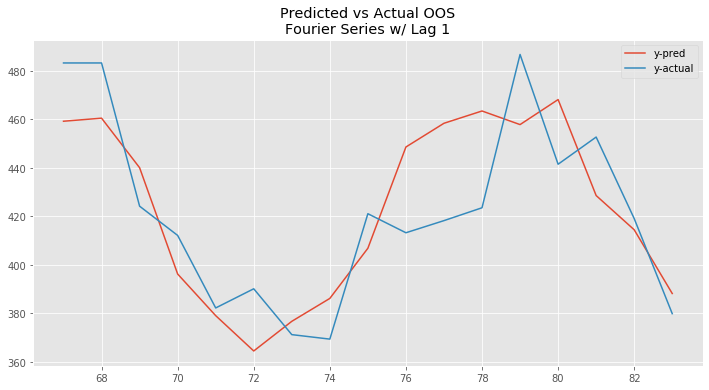

In [783]:
Y_pred = results.predict(X_test)

plt.plot(Y_pred, label = 'y-pred')
plt.plot(np.array(Y_pred.index), y_test, label = 'y-actual')
plt.title('Predicted vs Actual OOS\nFourier Series w/ Lag 1')
plt.legend()
plt.show()

In [785]:
perf_out['monthly_incoming_L1'] = testing.measure_error(y_test, Y_pred, label='Fourier Regressors')

+------------+----------------------+
|   metric   |        value         |
+------------+----------------------+
|   label    |  Fourier Regressors  |
|    RMSE    |  23.579672755347847  |
| RMSE_pcent | 0.055891583497059874 |
+------------+----------------------+


## Holt-Winters

### Holt-Winters Model - Daily Incoming

We will now use a seasonal Holt-Winters model to model daily transactions

In [786]:
y = list(daily_in['transaction_amount'])

y_train, y_test = train_test_split(y,
                                   test_size=0.2,
                                   random_state=42,
                                   shuffle=False)

In [787]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

hw = ExponentialSmoothing(np.array(y_train),trend='multiplicative',seasonal='mul',seasonal_periods=7)
fit_hw = hw.fit()

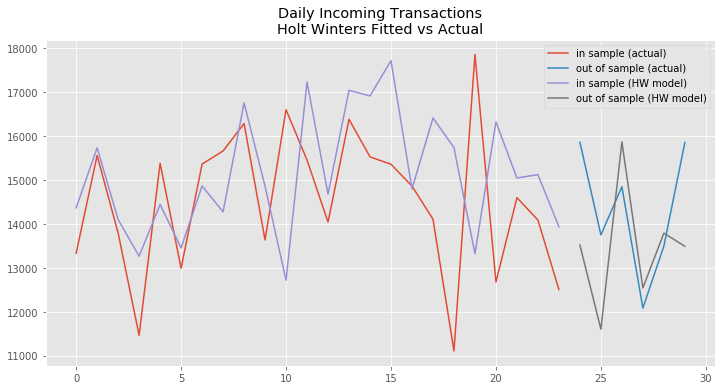

In [788]:
'''
Code adapted from Dan Trepanier, lecture 5.0 Smoothing
'''

IND = {'in':list(range(len(y_train))), 'out': len(y_train) + np.arange(len(y_test))}

HW = {'in': list(fit_hw.fittedvalues),
      'out': list(fit_hw.forecast(len(y_test)))}

plt.plot(IND['in'], y_train, label='in sample (actual)')
plt.plot(IND['out'], y_test, label='out of sample (actual)')

plt.plot(IND['in'], HW['in'], label='in sample (HW model)')
plt.plot(IND['out'], HW['out'], label='out of sample (HW model)')

plt.legend()
plt.title('Daily Incoming Transactions\nHolt Winters Fitted vs Actual')
plt.show()

In [789]:
from sklearn.metrics import mean_squared_error
import statistics
import math

rmse1_in = math.sqrt(mean_squared_error(y_train, HW['in']))
rmse1_in_pct = rmse1_in / statistics.mean(y_train)

rmse1_out = math.sqrt(mean_squared_error(y_test, HW['out']))
rmse1_out_pct = rmse1_out / statistics.mean(y_test)

In [790]:
rmse1_in_pct, rmse1_out_pct

(0.14047995065437321, 0.11764348682090925)

Holt-Winters on outgoing data

In [806]:
y = list(daily_out['transaction_amount'])

y_train, y_test = train_test_split(y,
                                   test_size=0.2,
                                   random_state=42,
                                   shuffle=False)

In [807]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

hw = ExponentialSmoothing(np.array(y_train),trend='multiplicative',seasonal='mul',seasonal_periods=7)
fit_hw = hw.fit()

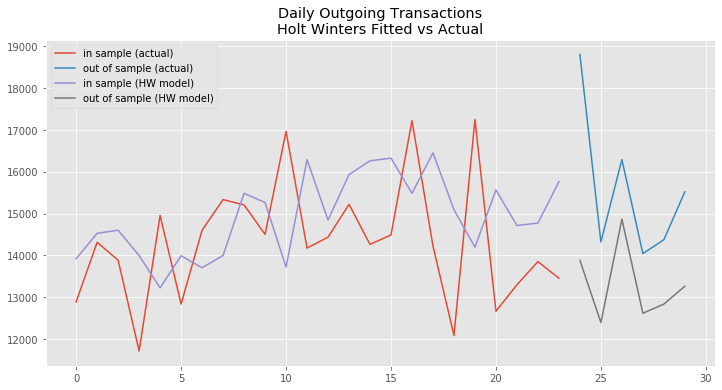

In [808]:
'''
Code adapted from Dan Trepanier, lecture 5.0 Smoothing
'''

IND = {'in':list(range(len(y_train))), 'out': len(y_train) + np.arange(len(y_test))}

HW = {'in': list(fit_hw.fittedvalues),
      'out': list(fit_hw.forecast(len(y_test)))}

plt.plot(IND['in'], y_train, label='in sample (actual)')
plt.plot(IND['out'], y_test, label='out of sample (actual)')

plt.plot(IND['in'], HW['in'], label='in sample (HW model)')
plt.plot(IND['out'], HW['out'], label='out of sample (HW model)')

plt.legend()
plt.title('Daily Outgoing Transactions\nHolt Winters Fitted vs Actual')
plt.show()

In [809]:
from sklearn.metrics import mean_squared_error
import statistics
import math

rmse1_in = math.sqrt(mean_squared_error(y_train, HW['in']))
rmse1_in_pct = rmse1_in / statistics.mean(y_train)

rmse1_out = math.sqrt(mean_squared_error(y_test, HW['out']))
rmse1_out_pct = rmse1_out / statistics.mean(y_test)

In [810]:
rmse1_in_pct, rmse1_out_pct

(0.1275596863114794, 0.1646629610037815)

##### Monthly Data

In [801]:
y = list(monthly_ts['Amount'])

y_train, y_test = train_test_split(y,
                                   test_size=0.2,
                                   random_state=42,
                                   shuffle=False)

In [802]:
hw = ExponentialSmoothing(np.array(y_train),trend='additive',seasonal='add',seasonal_periods=12)
fit_hw = hw.fit()

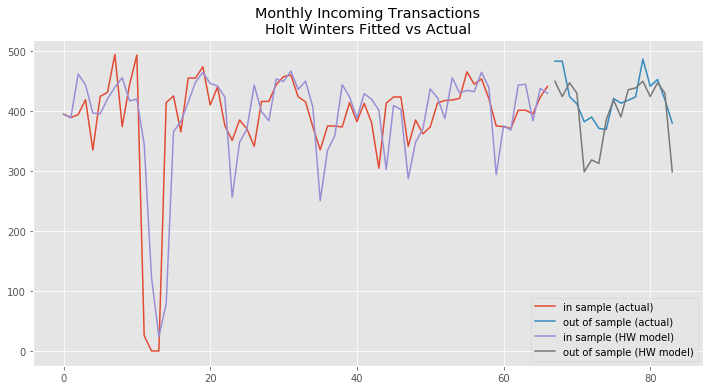

In [803]:
'''
Code adapted from Dan Trepanier, lecture 5.0 Smoothing
'''

IND = {'in':list(range(len(y_train))), 'out': len(y_train) + np.arange(len(y_test))}

HW = {'in': list(fit_hw.fittedvalues),
      'out': list(fit_hw.forecast(len(y_test)))}

plt.plot(IND['in'], y_train, label='in sample (actual)')
plt.plot(IND['out'], y_test, label='out of sample (actual)')

plt.plot(IND['in'], HW['in'], label='in sample (HW model)')
plt.plot(IND['out'], HW['out'], label='out of sample (HW model)')

plt.legend()
plt.title('Monthly Incoming Transactions\nHolt Winters Fitted vs Actual')
plt.show()

In [804]:
rmse_HW_m_in = math.sqrt(mean_squared_error(y_train, HW['in']))
rmse_HW_m_in_pct = rmse_HW_m_in / statistics.mean(y_train)

rmse_HW_m_out = math.sqrt(mean_squared_error(y_test, HW['out']))
rmse_HW_m_out_pct = rmse_HW_m_out / statistics.mean(y_test)

In [805]:
rmse_HW_m_in_pct, rmse_HW_m_out_pct

(0.1864396464030952, 0.10061321099591977)

## SARIMA model - Monthly transactions

In [717]:
E = np.random.randn(500)
X = build.build_arma([.5,.3], [-.3], errors=E, show=True)

X_train, X_test = train_test_split(X,
                                   test_size=0.2,
                                   random_state=42,
                                   shuffle=False)

| ARMA(2, 1) process | mean: -0.1162 | st_dev: 1.1756 |
---
phi_1 = +0.5000
phi_2 = +0.3000
---
theta_1 = -0.3000
---


In [718]:
y = list(monthly_ts['Amount'])

y_train, y_test = train_test_split(y,
                                   test_size=0.2,
                                   random_state=42,
                                   shuffle=False)

C:\Users\mohdh\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\mohdh\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\mohdh\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\mohdh\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\mohdh\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\

ARMA Grid Search 6 X 6

+------+----------+----------+----------+----------+----------+----------+
| p\q  |  q (0)   |  q (1)   |  q (2)   |  q (3)   |  q (4)   |  q (5)   |
+------+----------+----------+----------+----------+----------+----------+
| p(0) |   n/a    |  1247.98 |  1182.59 |  1174.03 |  1160.33 |  1164.76 |
| p(1) |  1217.50 |  1161.08 |  1147.80 |  1149.90 |  1155.71 |   n/a    |
| p(2) |  1139.72 |  1143.20 |  1149.17 |  1155.09 |  1161.08 |   n/a    |
| p(3) |  1143.35 |  1149.15 |  1154.99 |  1160.93 |  1166.89 |  1173.77 |
| p(4) |  1149.23 |  1154.97 |  1157.50 |  1161.44 |  1169.25 |  1172.55 |
+------+----------+----------+----------+----------+----------+----------+
time required 21.056959629058838


C:\Users\mohdh\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


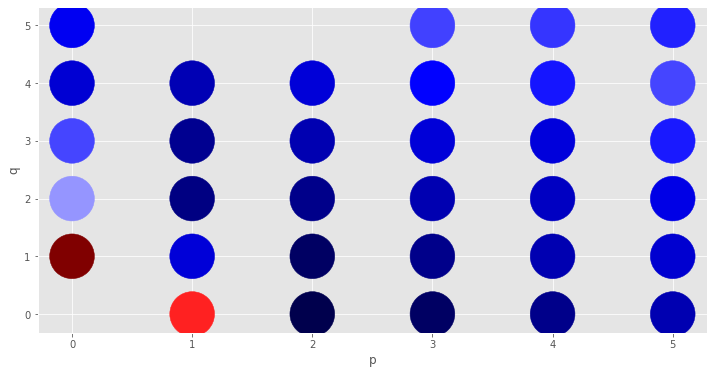

In [719]:
r = grid.run_grid(X_train, max_order=5, multi=False)

In [745]:
sarima = sm.tsa.statespace.SARIMAX

model = sarima(y_train, trend='n', order=(4,1,3), seasonal_order=(1,0,1,12))
f = model.fit()
print(f.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                   67
Model:             SARIMAX(4, 1, 3)x(1, 0, 1, 12)   Log Likelihood                -372.244
Date:                            Sun, 17 Nov 2019   AIC                            764.488
Time:                                    19:37:38   BIC                            786.385
Sample:                                         0   HQIC                           773.141
                                             - 67                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5960      0.142     -4.205      0.000      -0.874      -0.318
ar.L2         -0.0760      0.133   

In [746]:
N_in = list(range(len(y_train)))

y_raw = f.fittedvalues
y_hat = [y_raw[2],y_raw[2]] + list(y_raw[2:])
len(y_hat)

67

---------------
Monthly Data
SARIMA(3,1,2)(2,0,1)_12
---------------


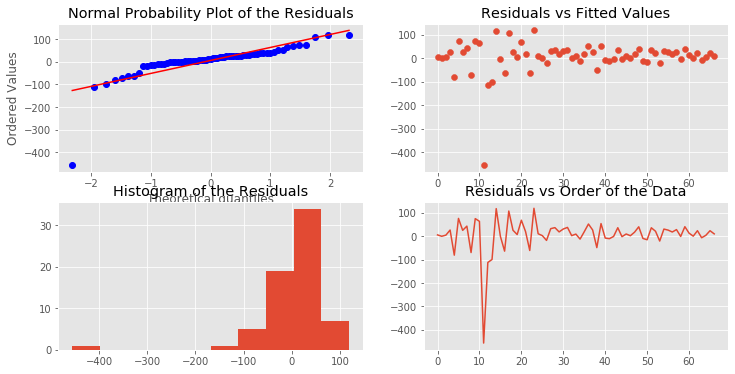

Ljung-Box Test
H_0 (p>0.05) --> The data are independently distributed -- i.e. there's no auto correlations
H_a (p<0.05) --> The data are not independently distributed -- i.e. there is auto correlations
p_values [0.92017333 0.8941063  0.97356485 0.98969863 0.99614382 0.58453193
 0.66771067 0.76433945 0.83837797 0.88614089 0.90018206 0.87503562
 0.91559948 0.93578242 0.95803539 0.97316157 0.97676461 0.98500434
 0.9885497  0.99258877]
There does not appear to be information left in the residuals
+------------+-------------------------+
|   metric   |          value          |
+------------+-------------------------+
|   label    | SARIMA(3,1,2)(2,0,1)_12 |
|    RMSE    |    71.21615387977683    |
| RMSE_pcent |   0.18269751541386195   |
+------------+-------------------------+


In [747]:
print('---------------\n%s\n---------------' % ('Monthly Data\nSARIMA(3,1,2)(2,0,1)_12'))
testing.eval_plot(N_in, y_train, y_hat)
perf_in['SARIMA(3,1,2)(2,0,1)_12'] = testing.measure_error(y_train, y_hat, label='SARIMA(3,1,2)(2,0,1)_12')

### T.B.O.Y.

Below, present the models we chose

Next, choose the best model

Last, recommend a workflow